# Polynomial Regression Example

In [1]:
import sys
sys.path.append('../../pyLearnAlgorithms')
from pyLearnAlgorithms.load_data import LoadData
from pyLearnAlgorithms.graph_view import GraphView
from pyLearnAlgorithms.polynomial_regression import PolynomialRegression
from pyLearnAlgorithms.split_data import SplitData
import numpy as np

In [2]:
dataset = LoadData('../tests/datasets', 'HealthInsurance.csv')
data = dataset.load_csv()

In [3]:
split = SplitData(data)
data_train, data_test = split.split_train_test(0.2)
print(data_train.size)
print(data_test.size)

16
4


In [4]:
data_train = dataset.convert_numpy_array(data_train)
data_test = dataset.convert_numpy_array(data_test)
X, y = np.atleast_2d(data_train[:, 0]).T, data_train[:, 1]
Xtest, ytest = np.atleast_2d(data_test[:, 0]).T, data_test[:, 1]

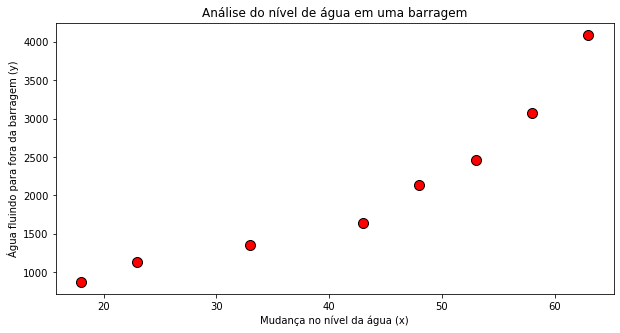

In [5]:
dataset_graph = GraphView(X, y)
dataset_graph.view_data('Mudança no nível da água (x)',
                        'Água fluindo para fora da barragem (y)', 
                        'Análise do nível de água em uma barragem')

In [6]:
regressor = PolynomialRegression(X, y)
X_poly = regressor.polyFeatures(X, 1)
X_poly, mu, sigma = regressor.featureNormalize(X_poly)

In [7]:
Xtest = regressor.prepareExtracts(Xtest, ytest, 1)

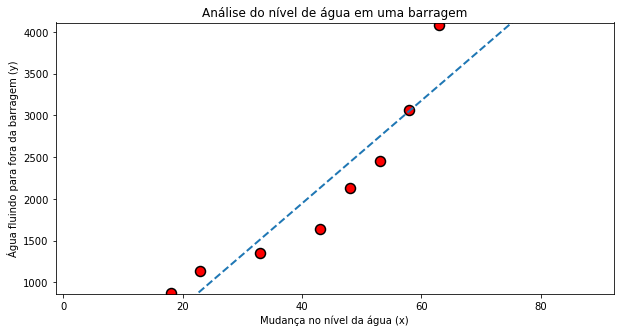

In [8]:
dataset_graph = GraphView(X, y)
dataset_graph.model_poly('Mudança no nível da água (x)',
                         'Água fluindo para fora da barragem (y)', 
                         'Análise do nível de água em uma barragem', 
                         polynomial_degree = 1, 
                         lambda_ = 0, 
                         maxiter = 200)

In [9]:
train_error, val_error = regressor.learningCurve(X_poly, y, Xtest, ytest, 0)
print('# Training Examples\tTraining Error\t\tCross Validation Error')
for i in range(y.size):
    print('{}\t\t\t{}\t{}'.format(i+1, train_error[i], val_error[i]))

# Training Examples	Training Error		Cross Validation Error
1			7.775509673535184e-16	267913.5556821248
2			1.4469093150719335e-12	12950.138758312105
3			15380.775641025699	34595.72127844287
4			16372.379251700684	22669.994645998482
5			26928.31827956991	12860.442088227683
6			22518.38197146566	12396.176364121391
7			73506.8387553041	23250.707038525765
8			69436.53234557598	28266.366900306926


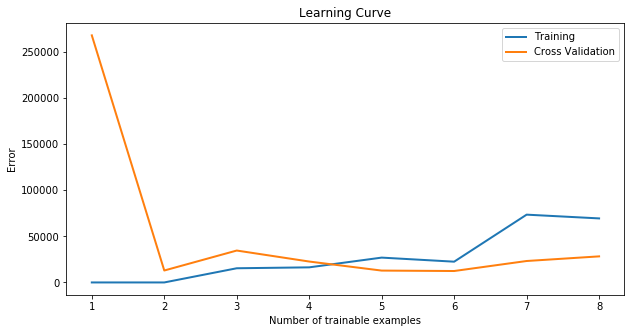

In [10]:
dataset_graph.learning_curve(train_error, val_error)

In [11]:
lambda_vec, error_train, error_val = regressor.validationCurve(X_poly,y,Xtest,ytest)
print('# Training Examples\tTraining Error\t\tCross Validation Error')
for i in range(y.size):
    print('{}\t\t\t{}\t{}'.format(i+1, train_error[i], val_error[i]))

# Training Examples	Training Error		Cross Validation Error
1			7.775509673535184e-16	267913.5556821248
2			1.4469093150719335e-12	12950.138758312105
3			15380.775641025699	34595.72127844287
4			16372.379251700684	22669.994645998482
5			26928.31827956991	12860.442088227683
6			22518.38197146566	12396.176364121391
7			73506.8387553041	23250.707038525765
8			69436.53234557598	28266.366900306926


In [12]:
lambda_vec

[0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

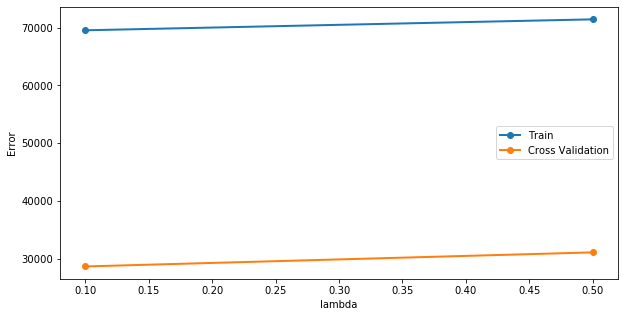

In [13]:
dataset_graph.validation_curve_poly(X_poly, y, Xtest, ytest, lambda_vec = [0.1, 0.5])

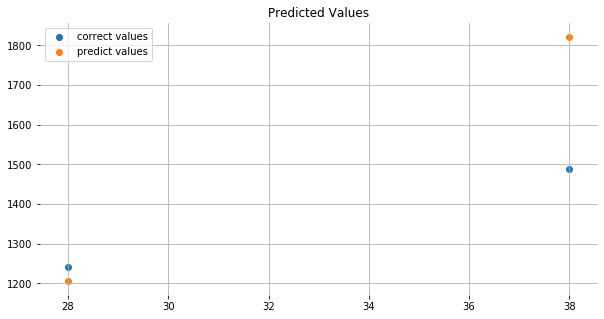

In [14]:
pred = regressor.predict(Xtest, X_poly, y, lambda_ = 0) 
dataset_graph.predicted_values(data_test[:, 0], ytest, pred)

In [15]:
optimize  =regressor.trainPolyReg(1, 0 , 200)
# rename method = trainPolyReg

In [16]:
optimize.x

array([2092.125     , 1008.70754367])